# **Conformal Geoemtric Algebra - Plotting Elements**

In this notebook we focus on plotting some of the elements we've created in the previous notebooks.

In [15]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

# using Plots
# plotly();
using PlotlyJS
include("./auxiliary.jl")

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`


translate (generic function with 3 methods)

## 1. Plotting Points

Let's start by plotting points as single objects.

In [16]:
function plotpoint(pts::Vector{<: MultiVector};
        mode="markers",
        plottype="scatter3d",
        kwargs...)
    
    x = [i.e1 for i in pts]
    y = [i.e2 for i in pts]
    z = [i.e3 for i in pts]
    
    scatter(x=x,y=y,z=z,mode=mode,type=plottype;kwargs...) 
end

function plotpoint(p::MultiVector; plottype="scatter3d", kwargs...)
    plotpoint([p];plottype=plottype, kwargs...)
end

a = point(2,0,0)
b = point(0,2,0)
c = point(0,0,2)
plot(
    [
        plotpoint(a),
        plotpoint([b,c])
    ]
)

data: [
  "scatter3d with fields mode, type, x, y, and z",
  "scatter3d with fields mode, type, x, y, and z"
]

layout: "layout with fields margin and template"

## 2. Plotting Point Pairs

Remember that a point pair is can be represented as a multivector $p \wedge q$.
We use the empty circle marker in order to represent it differently

In [17]:
function plotpointpair(p_q::MultiVector;
        marker=attr(symbol="circle-open"),
        plottype="scatter3d", kwargs...)
    
    T = p_q
    G = T/√scalar(T^2)
    Prj = (1+G)/2
    p = Prj * ((T) ⋅ n∞) * reverse(Prj)
    q = -reverse(Prj) * ((T) ⋅ n∞) * Prj
    plotpoint([p,q]; plottype = plottype, marker = marker, kwargs...)
end

plotpointpair (generic function with 1 method)

In [18]:
plot([
        plotpointpair(a∧b),
        plotpointpair(b∧c,
                      marker=(attr(
                                    size=4,
                                    symbol="circle-open"
                )
            )
        )
    ]
)

data: [
  "scatter3d with fields marker, mode, type, x, y, and z",
  "scatter3d with fields marker, mode, type, x, y, and z"
]

layout: "layout with fields margin and template"

## 3. Plotting Lines

In 3D space, our flats are either lines or planes.

A line can easily be represented by $p \wedge q \wedge n_\infty$, or
$p \wedge \mathbf v \wedge n_\infty$.



In [19]:
line(p::MultiVector, q::MultiVector) = p ∧ q ∧ n∞

function line(v::Vector, p::MultiVector=point(0,0,0))
    return p ∧ multivector(v) ∧ n∞
end

line (generic function with 3 methods)

In [20]:
p = point(0,1,0)
q = point(2,3,0)

v = [1,1]


l = line(p,q)
# the difference here will be on the line weight
l = line(v,p)

-1.0×e1e₊e2-1.0×e1e2e₋-1.0×e1e₊e₋+1.0×e2e₋e₊ ∈ Cl(4, 1, 0)

In [21]:
function plotline(l::MultiVector,
        linelengthfactor=1;
        mode="lines",
        plottype="scatter3d",
        kwargs...)
    
    weight = norm(n∞ ⨼ (no ⨼ l))
    v = n∞ ⨼ (no ⨼ l)/weight
    d = getblades((no ⨼ l) / l)
    
    lstart = linelengthfactor*v + d
    lend   = -linelengthfactor*v + d
    
    x = [i.e1 for i in [lstart,lend]]
    y = [i.e2 for i in [lstart,lend]]
    z = [i.e3 for i in [lstart,lend]]
    
    scatter(x=x,y=y,z=z,mode=mode,type=plottype;kwargs...) 
end


plotline (generic function with 2 methods)

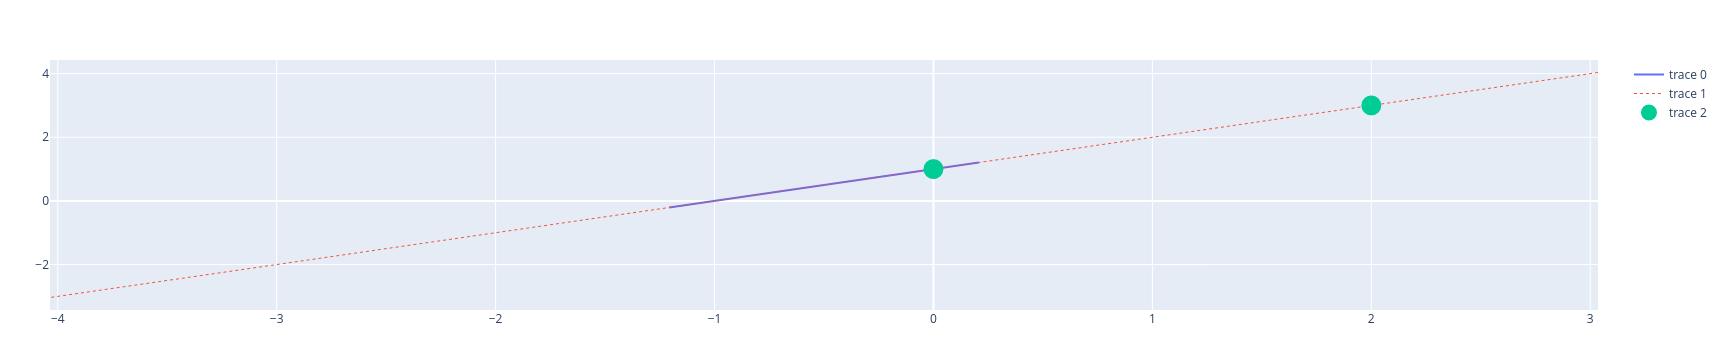

In [22]:
p1 = plotline(l,plottype="scatter")

l2 = line(p,q)

p2 = plotline(l2,5,plottype="scatter",line=attr(width=1, dash="dot"))

p3 = plotpoint([p,q],plottype="scatter",marker=attr(size=20))
plot([p1,p2,p3])

## 4. Plotting Planes

Remember that dual planes are represented by

$$
\mathbf n + \delta n_\infty,
$$
where $\mathbf n$ is the vector normal to the plane and $\delta$ is the distance
from the origin. The direct plane can be obtained via dualization, or we can construct it as:

$$
$$

In [135]:
plane(a::MultiVector,b::MultiVector,c::MultiVector) = a ∧ b ∧ c ∧ n∞
plane(n::MultiVector,δ::Union{Real,MultiVector}) = cdual(n + δ*n∞)
function plane(n::Vector,δ::Real)
    n = n/norm(n)
    n = multivector(n)
    return plane(n, δ)
end

p = point(0,1,0)
q = point(2,3,0)
r = point(1,1,1)

Π = plane(p,q,r)

weight = norm(n∞ ⨼ (no ⨼ Π))
E∞ = n∞ ⨼ (no ⨼ Π)/weight
n = edual(A)

d_vec = getblades((no ⨼ Π) / Π)
d = F(d_vec)

δ = norm(d_vec)

0.5773502691896256

In [136]:
function plotplane(Π::MultiVector,
        planelengthfactor=1;
        color="rgba(244,22,100,0.6)",
        kwargs...)
    
    weight = norm(n∞ ⨼ (no ⨼ Π))
    A = n∞ ⨼ (no ⨼ Π)/weight
    n = edual(A)

    d_vec = getblades((no ⨼ Π) / Π)
    d = F(d_vec)

    δ = norm(d_vec)
    pts = [
        translate(d, planelengthfactor* point(1,0,0)),
        translate(d, planelengthfactor* point(0,1,0)),
        translate(d, planelengthfactor* point(0,0,1)),
        translate(d, planelengthfactor* point(-1,0,0)),
        translate(d, planelengthfactor* point(0,-1,0)),
        translate(d, planelengthfactor* point(0,0,-1)),
    ]
    pts = [(p ⨼ Π)/Π for p in pts]
    
    x = [i.e1 for i in pts]
    y = [i.e2 for i in pts]
    z = [i.e3 for i in pts]
    
    # scatter(x=x,y=y,z=z,mode=mode,type=plottype;kwargs...) 
    mesh3d(x=x,y=y,z=z;color=color, kwargs...)
end

m = plotplane(Π, 5)

s = plotpoint([p,q,r])

plot([s,m])

data: [
  "scatter3d with fields mode, type, x, y, and z",
  "mesh3d with fields color, type, x, y, and z"
]

layout: "layout with fields margin and template"

## 4. Plotting Sphere

First, let's write some auxiliary functions to create a unit normal sphere and to plot it.

In [137]:
function sphere(ρ::Real=1.0, c::MultiVector=point(0,0,0))
    cdual(c - ρ^2 * n∞ /2)
end
function sphere(ρ::Real, c::Vector)
    cdual(point(c...) - ρ^2 * n∞ /2)
end
function sphere(a::MultiVector,b::MultiVector,c::MultiVector,d::MultiVector)
    a ∧ b ∧ c ∧ d
end

function generatespherepoints(Σ)
    ρ = √scalar((Σ * grin(Σ))/((n∞ ⨼ Σ)^2));
    c = -(1/2)*(Σ * n∞ * Σ)/((n∞ ⨼ Σ)^2)
    
    n = 100
    u = range(-π, π; length = n)
    v = range(0, π; length = n)
    x = ρ.*cos.(u) * sin.(v)' .+ c.e1
    y = ρ.*sin.(u) * sin.(v)' .+ c.e2
    z = ρ.*ones(n) * cos.(v)' .+ c.e3
    return x,y,z
end

function plotsphere(Σ::MultiVector;showscale=false,kwargs...)
    x,y,z = generatespherepoints(Σ)
    surface(x=x, y=y, z=z;showscale=showscale, kwargs...)
end

plotsphere (generic function with 1 method)

In [138]:
p1 = plotsphere(sphere(1,point(1,1,1)),opacity=0.5)
p2 = plotsphere(sphere(),opacity=0.5,colorscale=[[0, "rgb(244,22,100,0.6)"], [1, "rgb(244,22,100,0.6)"]])

plot([p1,p2])

data: [
  "surface with fields opacity, showscale, type, x, y, and z",
  "surface with fields colorscale, opacity, showscale, type, x, y, and z"
]

layout: "layout with fields margin and template"

In [139]:
a = point(2,0,0)
b = point(0,2,0)
c = point(0,0,2)
d = point(-2,0,0)

Σ =sphere(a,b,c,d)

s = plotsphere(Σ, opacity=0.5,colorscale=[[0, "rgb(244,22,100,0.6)"], [1, "rgb(244,22,100,0.6)"]])
p = plotpoint([a,b,c,d])

plot([p,s])

data: [
  "scatter3d with fields mode, type, x, y, and z",
  "surface with fields colorscale, opacity, showscale, type, x, y, and z"
]

layout: "layout with fields margin and template"